### ■ Problem:
Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.
### ■ Detaylar:
- Bir departman bir konuda eğitim talep ediyor
- Gerekli/gereksiz değerlendirmeleri neticesinde eğitim alınıyor
- Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor
- Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor

### Hipotez 

- $ H_0: \mu_ö = \mu_s $
- $ H_1: \mu_ö \neq \mu_s $

In [86]:
import pandas as pd
import numpy as np

oncesi = pd. DataFrame ([123,119,119,116,123,123,121,120,117, 118, 121, 121, 121,123,119, 121,118,124,121,125, 115, 115, 119, 118, 121,117,117,120,120, 121,117, 118, 117, 123, 118, 124, 121,115,118,125,115])
sonrasi = pd. DataFrame ([118,127,122,132,124,123,115,129,132,128,134,128,138,140,130,134,144,124,140,134,129,122,138,134,124,122,126,133,127,135,136,130,132,117,133,125,129,133,120,117,123])


In [88]:
oncesi [0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [90]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,124


In [92]:
# Bu işlem veriyi dışarıdan aktarırken sorun yaşarsan çözmek içindir.
#BIRINCI VERI SETI

AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI", "SONRASI"]
print("'AYRIK' Veri Seti: \n\n", AYRIK.head(), "\n\n")


#IKINCI VERI SETI

#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd. DataFrame (GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"

#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)

#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd. DataFrame (GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME 
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])

#BIRLIKTE ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")


'AYRIK' Veri Seti: 

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      124 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



/var/folders/8v/8s2d06193hxccb1n1d4vwqhh0000gn/T/ipykernel_69743/3974743387.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ONCESI' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  GRUP_ONCESI[:] = "ONCESI"
/var/folders/8v/8s2d06193hxccb1n1d4vwqhh0000gn/T/ipykernel_69743/3974743387.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SONRASI' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  GRUP_SONRASI[:] = "SONRASI"


<Axes: xlabel='ONCESI_SONRASI', ylabel='PERFORMANS'>

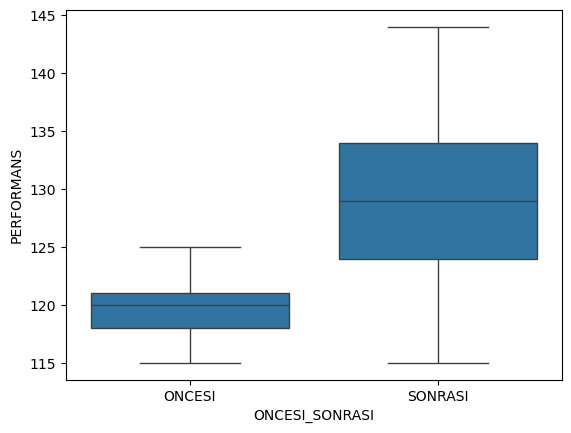

In [94]:
import seaborn as sbn 

sbn.boxplot(x="ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE)

### Varsayım Kontrolleri

In [97]:
from scipy.stats import shapiro

In [99]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9552979746605215, pvalue=0.10750911779999517)

In [101]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.984978998209128, pvalue=0.855101209570527)

In [103]:
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=24.2630820931349, pvalue=4.4462482045230715e-06)

### 1. Varsayım sağlanıyor 2.Varsayım sağlanmadı. Göz ardı edip ilgili testimizi gerçekleştiricez.

## Hipotez Testi

In [106]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

TtestResult(statistic=-7.399487625069415, pvalue=5.241045339803693e-09, df=40)

In [108]:
#okunurluğu arttırmak için
test_istatistigi, pvalue = stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)
print('Test İstatistiği = %.4f, p-değeri= %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = -7.3995, p-değeri= 0.0000


#### Yorum : H0:Eğitim öncesi ve sonrası performans eşittir. 
#### Ancak p-value değeri <0.05 yani H0 hipotezi reddedilmiştir. Yani eğitim işe yaramıştır.

# Nonparametrik Bağımlı İki Örneklem T Testi

In [113]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=38.0, pvalue=8.90670797648481e-07)

In [115]:
#okunurluğu arttırmak için
test_istatistigi, pvalue = stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)
print('Test İstatistiği = %.4f, p-değeri= %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 38.0000, p-değeri= 0.0000


##### Ancak p-value değeri <0.05 yani H0 hipotezi reddedilmiştir. Yani eğitim işe yaramıştır.